## Ouverture et affichage d'un fichier audio avec Python



Installation des packages et téléchargement d'un fichier audio exemple.

In [ ]:
!pip install matplotlib
!pip install soundfile
!wget http://sabiod.lis-lab.fr/pub/challenges/Biosonar/audio_example.wav

Il existe plusieurs manières de charger un signal audio avec Python. Dans cet exemple nous utiliserons la bibliothèque [Soundfile](https://pysoundfile.readthedocs.io/en/latest/).

In [3]:
import soundfile as sf
sig, sr = sf.read("audio_example.wav")
print("Taille du signal : %s"%sig.shape)

Taille du signal : 51200


La fonction prend en paramètre le nom du fichier (chemin + nom) et retourne 2 éléments :
- Le signal audio, si le fichier audio est en Mono (un seul canal), le signal sera un vecteur de dimension {nombre_de_sample} = {durée_du_signal} * {fréquence_échantillonage}. Si le fichier audio est un Stéréo (deux canaux), le signal sera une matrice de dimension [{nombre_de_sample},{nombre_de_canaux}].
- La fréquence d'échantillonnage (Sampling Rate)

Pour le challenge, seul des fichiers mono seront utilisé. Si besoin il est possible de ne charger qu'une partie du signal en utilisant les arguments : "start" et "stop" lors de l'appel à read.

Pour afficher le signal :

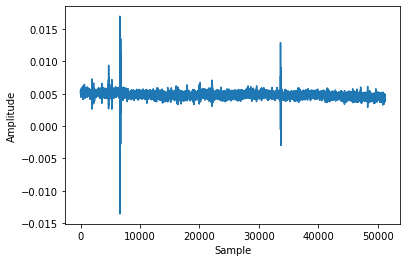

In [4]:
import matplotlib.pyplot as plt
plt.plot(sig)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

Il est également possible de tracer le spectrogramme du signal (représentation du temps fréquence).
Cette représentation permet d'avoir un aperçu du contenu fréquentiel de signal.

In [ ]:
!pip install matplotlib
!pip install librosa

In [5]:
import librosa as lr
import librosa.display
import numpy as np

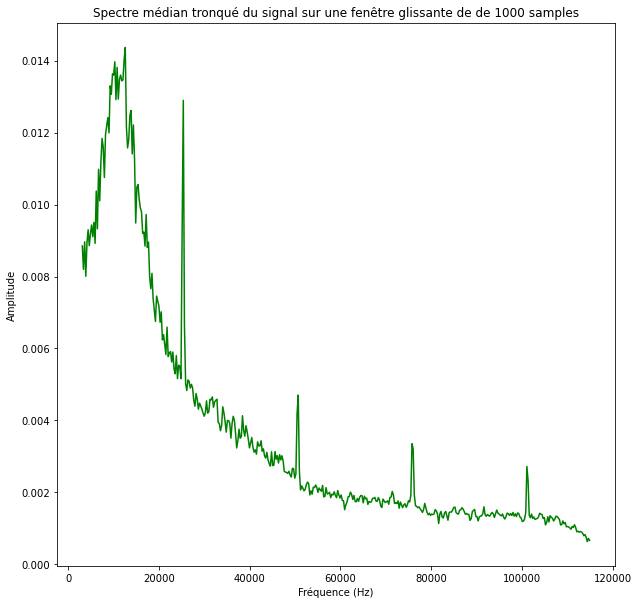

In [60]:
n_fft=1000 #permet d'avoir plus de features si on l'augmente, ici on en a 438

# Votre code original pour calculer le STFT
tf_sig = lr.stft(sig, n_fft=n_fft)
tf_sig = np.abs(tf_sig)

# Calcul des fréquences pour chaque point de la FFT
frequences = lr.fft_frequencies(sr=sr, n_fft=n_fft)

# Calcul de la médiane sur l'axe temporel
median = np.median(tf_sig, axis=1)[(3e3<frequences) & (frequences<(0.45*sr))]
frequences = frequences[(3e3<frequences) & (frequences<(0.45*sr))]

# Tracer le spectre avec les fréquences en abscisses
plt.figure(figsize=(10,10))
plt.plot(frequences, median,c='g')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title(f'Spectre médian tronqué du signal sur une fenêtre glissante de {n_fft} samples')
plt.show()

In [56]:
median.shape

(438,)

In [42]:
sr/2


128000.0

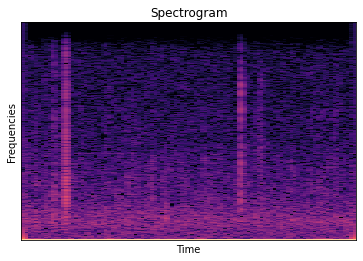

In [7]:
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max));plt.title("Spectrogram");plt.xlabel("Time"); plt.ylabel("Frequencies");plt.show()